In [95]:
#!pip3 install plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# RandomForest Classifier
# Logistic Regressioon
# KNN
# Naive Bayes

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, log_loss, confusion_matrix, classification_report, ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler                                #Used for standarization of input features 
from sklearn.svm import SVC                                                     #Support Vector Machine Model 
from sklearn.preprocessing import Normalizer                                    #Used for normalization of input features
from sklearn.linear_model import LogisticRegression                             #Logistic Regression Model 
from sklearn.naive_bayes import GaussianNB                                      #Gaussian Naive Bayes Model
from sklearn.ensemble import RandomForestClassifier                             #Random Forest Classifier Model 

Loading Data and Pre-processing

In [63]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [65]:
df = df.replace({'18-24':21, '25-29': 27, '30-34': 32, '35-39': 37, '40-44': 42, '45-49' : 47, '50-54': 52, '55-59': 57, '60-64': 62, '65-69': 67, '70-74': 72, '75-79':77, '80 or older': 80})
df = df.replace({'No, borderline diabetes':'No (Borderline Diabetes)', 'Yes (during pregnancy)': 'Yes (During Pregnancy)'})

In [66]:
# Numerical Data Statistics
df.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
AgeCategory,54.355759,17.720429,21.000000,42.000000,57.000000,67.000000,80.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


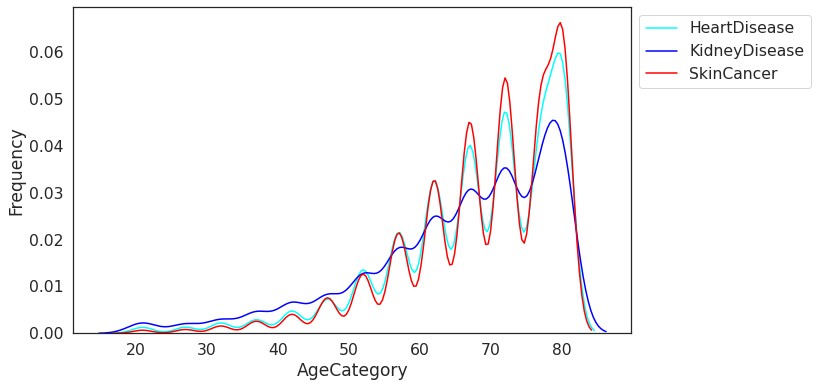

In [92]:
fig, ax = plt.subplots(figsize = (10,6))
sns.kdeplot(df[df["HeartDisease"]=='Yes']["AgeCategory"], color="Cyan", label="HeartDisease")
sns.kdeplot(df[df["KidneyDisease"]=='Yes']["AgeCategory"],color="Blue", label="KidneyDisease")
sns.kdeplot(df[df["SkinCancer"]=='Yes']["AgeCategory"],color="Red", label="SkinCancer")

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1, 1), loc=0)
plt.show()

In [9]:
fig = make_subplots(
    rows=7, cols=2, subplot_titles=("HeartDisease", "Smoking",
                                    "AlcoholDrinking","Stroke",
                                    "DiffWalking", "Sex",
                                    'Race', 'Diabetic',
                                    'PhysicalActivity','GenHealth',
                                    'Asthma', 'KidneyDisease',
                                    'SkinCancer'),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

#colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
colours = ['#ea4335', '#4285f4', '#fbbc05', '#34a853']
yes_red_no_blue_colors = ['green', '#ea4335']
yes_blue_no_red_colors = ['#ea4335', '#4285f4']
fig.add_trace(go.Pie(labels=np.array(df['HeartDisease'].value_counts().index),
                     values=[x for x in df['HeartDisease'].value_counts()], hole=.425,
                     textinfo='label+percent', rotation=-90, marker_colors = yes_red_no_blue_colors),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Smoking'].value_counts().index),
                     values=[x for x in df['Smoking'].value_counts()], hole=.425,
                     textinfo='label+percent', rotation=-90, marker_colors = yes_red_no_blue_colors),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df['AlcoholDrinking'].value_counts().index),
                     values=[x for x in df['AlcoholDrinking'].value_counts()], hole=.425,
                     textinfo='label+percent', rotation=-90, marker_colors = yes_red_no_blue_colors),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Stroke'].value_counts().index),
                     values=[x for x in df['Stroke'].value_counts()], hole=.425,
                     textinfo='label+percent', rotation=-90, marker_colors = yes_red_no_blue_colors),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(df['DiffWalking'].value_counts().index),
                     values=[x for x in df['DiffWalking'].value_counts()], hole=.425,
                     textinfo='label+percent', rotation=-90, marker_colors = yes_red_no_blue_colors),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Sex'].value_counts().index),
                     values=[x for x in df['Sex'].value_counts()], hole=.425,
                     textinfo='label+percent', rotation=-90, marker_colors=colours),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Race'].value_counts().index),
                     values=[x for x in df['Race'].value_counts()], hole=.425,
                     textinfo='label+percent', rotation=-90, marker_colors=colours),
              row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Diabetic'].value_counts().index),
                     values=[x for x in df['Diabetic'].value_counts()], hole=.425,
                     textinfo='label+percent', rotation=-90, marker_colors = yes_red_no_blue_colors),
              row=4, col=2)

fig.add_trace(go.Pie(labels=np.array(df['PhysicalActivity'].value_counts().index),
                     values=[x for x in df['PhysicalActivity'].value_counts()], hole=.425,
                     textinfo='label+percent', rotation=-90, marker_colors = yes_red_no_blue_colors),
              row=5, col=1)

gen_health_colors = ['lightgreen', 'orange', 'green', 'lightred', '#ea4335']
fig.add_trace(go.Pie(labels=np.array(df['GenHealth'].value_counts().index),
                     values=[x for x in df['GenHealth'].value_counts()], hole=.425,
                     textinfo='label+percent', rotation=-90, marker_colors = gen_health_colors),
              row=5, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Asthma'].value_counts().index),
                     values=[x for x in df['Asthma'].value_counts()], hole=.425,
                     textinfo='label+percent', rotation=-90, marker_colors = yes_red_no_blue_colors),
              row=6, col=1)

fig.add_trace(go.Pie(labels=np.array(df['KidneyDisease'].value_counts().index),
                     values=[x for x in df['KidneyDisease'].value_counts()], hole=.425,
                     textinfo='label+percent', rotation=-90, marker_colors = yes_red_no_blue_colors),
              row=6, col=2)

fig.add_trace(go.Pie(labels=np.array(df['SkinCancer'].value_counts().index),
                     values=[x for x in df['SkinCancer'].value_counts()], hole=.425,
                     textinfo='label+percent', rotation=-90, marker_colors = yes_red_no_blue_colors),
              row=7, col=1)


fig.update_layout(height=3000, font=dict(size=10), showlegend=False)

fig.show()

In [10]:
for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']:
    df[col] = df[col]/df[col].max()

In [11]:
#Process Binary Categorical Data 
df = df.replace({'Yes':1, 'No':0})
df = df.replace({'Male': 0, 'Female': 1})

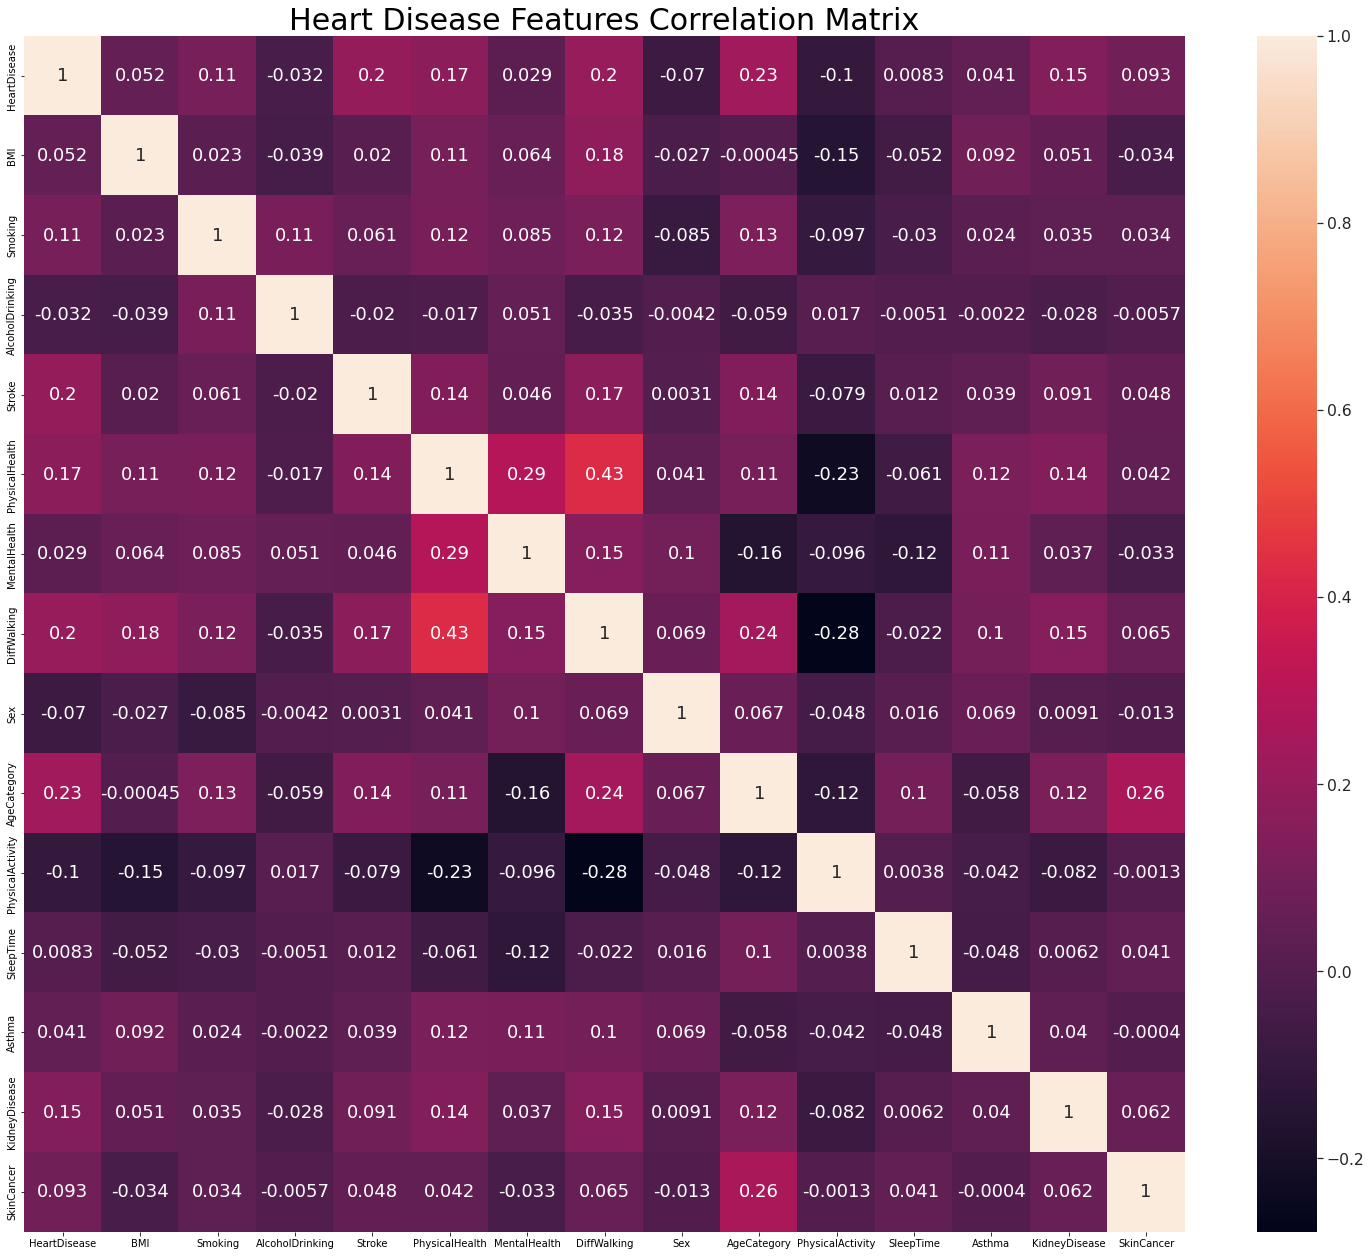

In [12]:
plt.figure(figsize = (26, 22))
plt.title('Heart Disease Features Correlation Matrix', fontsize =30)
sns.set(style = "white", font_scale = 1.425)
sns.heatmap(df.corr(), annot = True, annot_kws={"fontsize":18})

In [13]:
# Process Non-Binary Categorical Data using one hot encoding
#df = pd.get_dummies(df, columns=['Race', 'Diabetic', 'GenHealth', ], prefix = ['Race', 'Diabetic', 'GenHealth'])
df = df.replace({'No (Borderline Diabetes)': 0.75, 'Yes (During Pregnancy)': 0.5})
df = df.replace({'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4})
df = df.replace({'White': 0, 'Black': 1, 'Asian': 2, 'American Indian/Alaskan Native': 3, 'Other': 4, 'Hispanic': 5})

In [14]:
# Split Data Frame to features and labels
features = df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race','Diabetic', 'GenHealth']]

labels = df['HeartDisease']

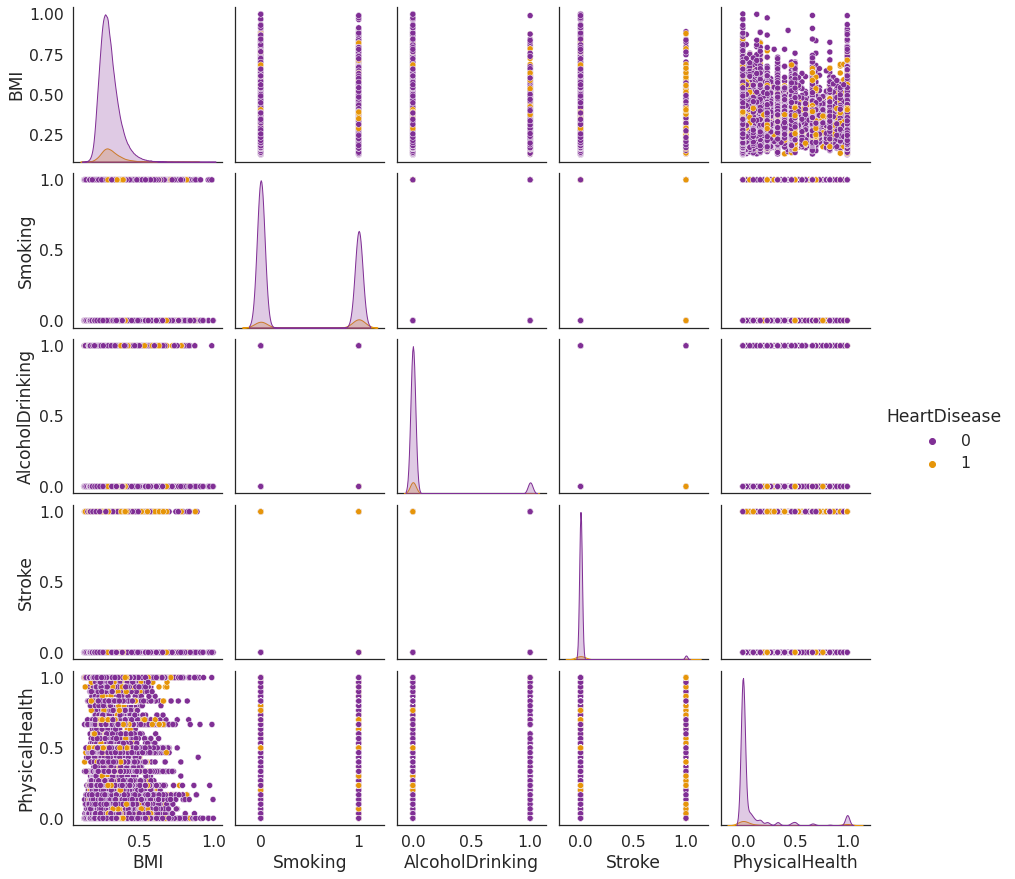

In [15]:
#sns.pairplot(df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'HeartDisease']], hue = 'HeartDisease', palette = 'CMRmap')

In [15]:
training_df = df[:int(len(df)*0.8)]
validation_df = df[int(len(df)*0.8):]

In [16]:
print('Training data set:')
print(training_df['HeartDisease'].value_counts())

print('\nValidation data set:')
print(validation_df['HeartDisease'].value_counts())

Training data set:
0    233851
1     21985
Name: HeartDisease, dtype: int64

Validation data set:
0    58571
1     5388
Name: HeartDisease, dtype: int64


In [17]:
# Our dataset is unbalanced.
# Dataset can be balanced by oversampling 
class_0 = training_df[training_df['HeartDisease'] == 0]
class_1 = training_df[training_df['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
training_df = pd.concat([class_0, class_1], axis=0)
print('Data in Train:')
print(training_df['HeartDisease'].value_counts())

Data in Train:
0    233851
1    233851
Name: HeartDisease, dtype: int64


In [18]:
class_0 = validation_df[validation_df['HeartDisease'] == 0]
class_1 = validation_df[validation_df['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
validation_df = pd.concat([class_0, class_1], axis=0)
print('Data in Train:')
print(validation_df['HeartDisease'].value_counts())

Data in Train:
0    58571
1    58571
Name: HeartDisease, dtype: int64


In [19]:
x_train = np.array(training_df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race','Diabetic', 'GenHealth']])
y_train = np.array(training_df['HeartDisease'])

x_val = np.array(validation_df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race','Diabetic', 'GenHealth']])
y_val = np.array(validation_df['HeartDisease'])

In [20]:
scaler = StandardScaler()  
normalizer = Normalizer() 
                   
scaler.fit(x_train)                                    #Fitting the input train values 
x_train_scaled = scaler.transform(x_train)             #Transforming the values and storing in x_train_scaled
x_val_scaled = scaler.transform(x_val) 
                
normalizer.fit(x_train)                                #Fitting the input train values
x_train_normalized = normalizer.transform(x_train)     #Transforming the values and storing in x_train_normalized
x_val_normalized = normalizer.transform(x_val)  

# Random Forest Classifier

In [112]:
rf_scaled = RandomForestClassifier(max_depth = 10, random_state = 100).fit(x_train_scaled, y_train)
#rf_normalized = RandomForestClassifier(max_depth = 10, random_state = 100).fit(x_train_normalized, y_train)

y_scaled_pred_rf = rf_scaled.predict(x_val_scaled)
#y_normalized_pred = rf_normalized.predict(x_val_normalized)

print(classification_report(y_scaled_pred_rf, y_val))
#print(classification_report(y_normalized_pred, y_val))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75     54851
           1       0.79      0.75      0.77     62291

    accuracy                           0.76    117142
   macro avg       0.76      0.76      0.76    117142
weighted avg       0.76      0.76      0.76    117142



In [113]:
#Empty list for all results
accuracy_scaled = []             
f1_score_scaled = []
precision_score_scaled = []
recall_score_scaled = []
roc_auc_score_scaled = []
log_loss_scaled = []

In [114]:
accuracy_scaled.append(accuracy_score(y_scaled_pred_rf, y_val))              #Appending the results with lists 
f1_score_scaled.append(f1_score(y_scaled_pred_rf, y_val))
precision_score_scaled.append(precision_score(y_scaled_pred_rf, y_val))
recall_score_scaled.append(recall_score(y_scaled_pred_rf, y_val))
roc_auc_score_scaled.append(roc_auc_score(y_scaled_pred_rf, y_val))
log_loss_scaled.append(log_loss(y_scaled_pred_rf, y_val))

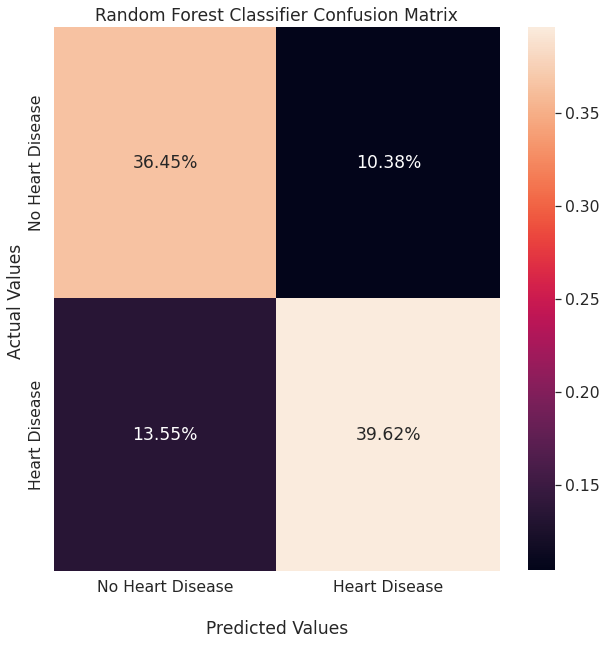

In [116]:
cm = confusion_matrix(y_scaled_pred_rf, y_val)
plt.figure(figsize=(10,10))
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True)

ax.set_title('Random Forest Classifier Confusion Matrix')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No Heart Disease','Heart Disease'])
ax.yaxis.set_ticklabels(['No Heart Disease','Heart Disease'])

plt.show()

# Logistic Regression

In [117]:
#Train our models
logistic_scaled = LogisticRegression(random_state = 100)
logistic_normalized = LogisticRegression(random_state = 100)

logistic_scaled.fit(x_train_scaled, y_train)
#logistic_normalized.fit(x_train_normalized, y_train)

LogisticRegression(random_state=100)

In [118]:
## Make our predictions
y_scaled_pred_lr = logistic_scaled.predict(x_val_scaled)
#y_normalized_pred_lr = logistic_normalized.predict(x_val_normalized)

In [119]:
# Print Results
print(classification_report(y_scaled_pred_lr, y_val))
#print(classification_report(y_normalized_pred_lr, y_val))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76     58052
           1       0.76      0.76      0.76     59090

    accuracy                           0.76    117142
   macro avg       0.76      0.76      0.76    117142
weighted avg       0.76      0.76      0.76    117142



In [120]:
#Appending the results with lists
accuracy_scaled.append(accuracy_score(y_scaled_pred_lr, y_val))               
f1_score_scaled.append(f1_score(y_scaled_pred_lr, y_val))
precision_score_scaled.append(precision_score(y_scaled_pred_lr, y_val))
recall_score_scaled.append(recall_score(y_scaled_pred_lr, y_val))
roc_auc_score_scaled.append(roc_auc_score(y_scaled_pred_lr, y_val))
log_loss_scaled.append(log_loss(y_scaled_pred_lr, y_val))

# KNN (K Nearest Neighbors)

In [106]:
#Train our models
KNN_scaled = KNeighborsClassifier(n_neighbors = 5)
KNN_scaled.fit(x_train_scaled, y_train)    

#KNN_normalized = KNeighborsClassifier(n_neighbors = 5)             
#KNN_normalized.fit(x_train_normalized, y_train)

KNeighborsClassifier()

In [107]:
# Make our predictions
y_scaled_pred_knn = KNN_scaled.predict(x_val_scaled)
#y_normalized_pred = KNN_normalized.predict(x_val_normalized)

In [108]:
# Print Results
print(classification_report(y_scaled_pred_knn, y_val))
#print(classification_report(y_normalized_pred, y_val))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71     77807
           1       0.50      0.74      0.60     39335

    accuracy                           0.66    117142
   macro avg       0.66      0.68      0.65    117142
weighted avg       0.72      0.66      0.67    117142



In [121]:
#Appending the results with lists
accuracy_scaled.append(accuracy_score(y_scaled_pred_knn, y_val))               
f1_score_scaled.append(f1_score(y_scaled_pred_knn, y_val))
precision_score_scaled.append(precision_score(y_scaled_pred_knn, y_val))
recall_score_scaled.append(recall_score(y_scaled_pred_knn, y_val))
roc_auc_score_scaled.append(roc_auc_score(y_scaled_pred_knn, y_val))
log_loss_scaled.append(log_loss(y_scaled_pred_knn, y_val))

# Naive Bayes

In [122]:
#Train our models
N_bayes_scaled = GaussianNB()
#N_bayes_normalized = GaussianNB()

N_bayes_scaled.fit(x_train_scaled, y_train)                        
#N_bayes_normalized.fit(x_train_normalized, y_train)

GaussianNB()

In [123]:
# Make our predictions
y_scaled_pred_nb = N_bayes_scaled.predict(x_val_scaled)
#y_normalized_pred = N_bayes_normalized.predict(x_val_normalized)

In [124]:
# Print Results
print(classification_report(y_scaled_pred_nb, y_val))
#print(classification_report(y_normalized_pred, y_val))

              precision    recall  f1-score   support

           0       0.82      0.67      0.74     71052
           1       0.61      0.77      0.68     46090

    accuracy                           0.71    117142
   macro avg       0.71      0.72      0.71    117142
weighted avg       0.73      0.71      0.72    117142



In [125]:
#Appending the results with lists
accuracy_scaled.append(accuracy_score(y_scaled_pred_nb, y_val))               
f1_score_scaled.append(f1_score(y_scaled_pred_nb, y_val))
precision_score_scaled.append(precision_score(y_scaled_pred_nb, y_val))
recall_score_scaled.append(recall_score(y_scaled_pred_nb, y_val))
roc_auc_score_scaled.append(roc_auc_score(y_scaled_pred_nb, y_val))
log_loss_scaled.append(log_loss(y_scaled_pred_nb, y_val))

Comparing Models

Text(0.5, 1.0, 'Final scaled output results for machine learning models')

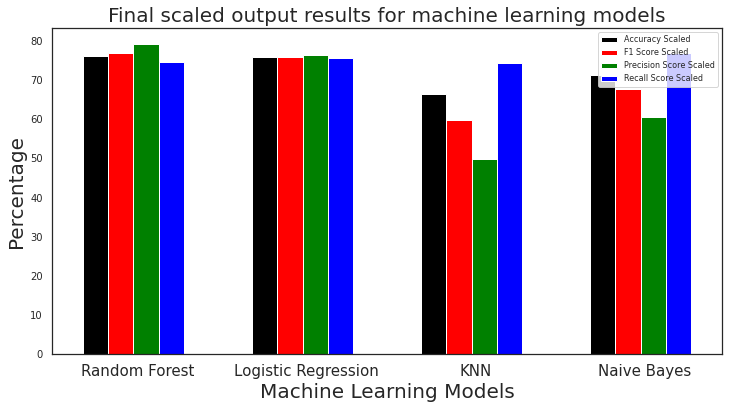

In [126]:
# 'Random Forest Classifier', 'Logistic Regression','KNN', 'Naive Bayes' model values are plotted
models = ['Random Forest', 'Logistic Regression','KNN', 'Naive Bayes']
models = np.arange(len(models))
plt.figure(figsize = (12, 6))           #Increasing the size of the figure so that it is clear 
plt.yticks(fontsize = 10)                #Increasing the fontsize of the y axis just to make it clear
color=['black', 'red', 'green', 'blue', 'cyan']
#getting a barplot between models and accurcy_scaled list and multiplying those with 100 to make it clear in graph
plt.bar(models, [i * 100 for i in accuracy_scaled], width = 0.15,color = color[0]) 
#Performing the same operations for other lists so that we would draw them later 
plt.bar(models + 0.15, [i * 100 for i in f1_score_scaled], width = 0.15, color = color[1])
plt.bar(models + 0.15 * 2, [i * 100 for i in precision_score_scaled], width = 0.15, color = color[2])
plt.bar(models + 0.15 * 3, [i * 100 for i in recall_score_scaled], width = 0.15, color = color[3])
#plt.bar(models + 0.15 * 4, [i * 100 for i in roc_auc_score_scaled], width = 0.15, color = color[0])
plt.legend(['Accuracy Scaled', 'F1 Score Scaled', 'Precision Score Scaled', 'Recall Score Scaled'], fontsize = 8)
plt.xticks([i + 0.25 for i in range(4)], ['Random Forest', 'Logistic Regression','KNN', 'Naive Bayes'], fontsize = 15)
plt.xlabel('Machine Learning Models', fontsize = 20) #Creating a label for the x-axis 
plt.ylabel('Percentage', fontsize = 20)  #Creating a label for the y-axis 
plt.title('Final scaled output results for machine learning models', fontsize = 20) #Adding a title with modified font size 

In [127]:
accuracy_scaled

[0.7606665414624985,
 0.7585067695617285,
 0.6628877772276383,
 0.7122552116234997]

In [160]:
y_test = [y_scaled_pred_rf,y_scaled_pred_lr,y_scaled_pred_knn,y_scaled_pred_nb]
models = ['Random Forest', 'Logistic Regression','KNN', 'Naive Bayes']
def model_evaluation():
  for i in range(4): #number of models
    print("\n")
    print(models[i])
    print(f"Accuracy: {accuracy_scaled[i]:.2%}")
    print(f"Precision: {precision_score_scaled[i]:.4%}")
    print(f"Recall: {recall_score_scaled[i]:.4%}")
    print(f"F1 Score: {f1_score_scaled[i]:.4%}")
    cm = confusion_matrix(y_test[i], y_val)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()  
    disp.ax_.set_title(models[i])
 



Random Forest
Accuracy: 76.07%
Precision: 79.2423%
Recall: 74.5100%
F1 Score: 76.8033%


Logistic Regression
Accuracy: 75.85%
Precision: 76.2937%
Recall: 75.6236%
F1 Score: 75.9572%


KNN
Accuracy: 66.29%
Precision: 49.8677%
Recall: 74.2545%
F1 Score: 59.6654%


Naive Bayes
Accuracy: 71.23%
Precision: 60.5709%
Recall: 76.9733%
F1 Score: 67.7941%


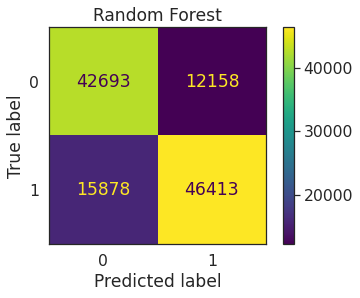

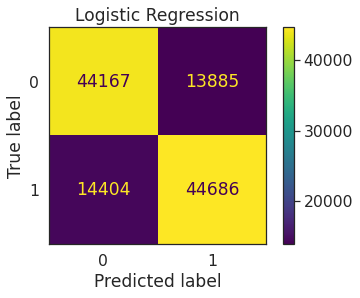

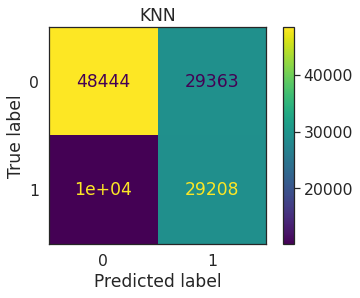

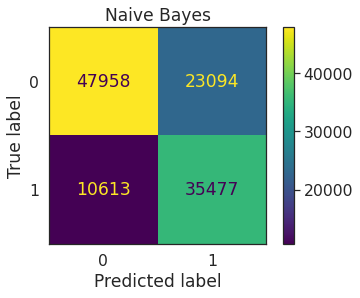

In [161]:
model_evaluation()